# Explore here

In [6]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")


In [7]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

lz_uri = 'spotify:artist:36QJpDe2go2KgaRleHCDTp'

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id,client_secret=client_secret))
results = spotify.artist_top_tracks(lz_uri)

canciones=[]
popularidad=[]
duracion=[]



for track in results['tracks'][:10]:
    print('track    : ' + track['name'])
    canciones.append(track['name'])
    popularidad.append(track['popularity'])
    duracion.append(track['duration_ms']/(1000*60)%60)
    
    


track    : Stairway to Heaven - Remaster
track    : Immigrant Song - Remaster
track    : Whole Lotta Love - 1990 Remaster
track    : Black Dog - Remaster
track    : Rock and Roll - Remaster
track    : Going to California - Remaster
track    : Ramble On - 1990 Remaster
track    : Good Times Bad Times - 1993 Remaster
track    : Kashmir - Remaster
track    : Over the Hills and Far Away - Remaster


In [8]:
df=pd.DataFrame()

df['Canciones']=pd.DataFrame(canciones)
df['Popularidad']=pd.DataFrame(popularidad)
df['Duracion']=pd.DataFrame(duracion)
df.index +=1

df

,Canciones,Popularidad,Duracion
1,Stairway to Heaven - Remaster,78,8.047167
2,Immigrant Song - Remaster,78,2.437500
3,Whole Lotta Love - 1990 Remaster,75,5.564883
4,Black Dog - Remaster,72,4.923100
5,Rock and Roll - Remaster,70,3.676000
6,Going to California - Remaster,70,3.536000
7,Ramble On - 1990 Remaster,69,4.388883
8,Good Times Bad Times - 1993 Remaster,69,2.771100
9,Kashmir - Remaster,69,8.618750
10,Over the Hills and Far Away - Remaster,66,4.848883


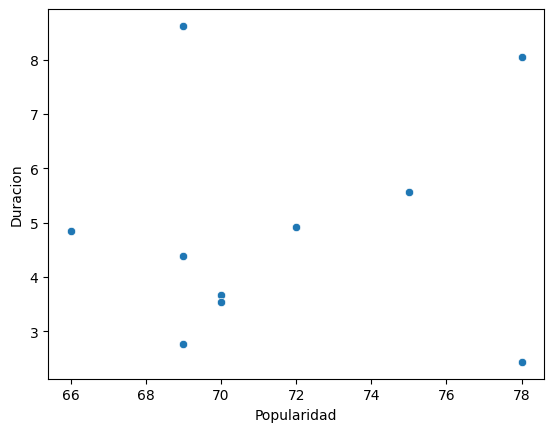

In [9]:

scatter = sns.scatterplot(data = df, x = "Popularidad", y = "Duracion")
fig = scatter.get_figure()
fig.savefig("scatter_plot.png")